In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from wordcloud import WordCloud


In [2]:
# remove warnings

import warnings

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\Ankit Panday\Downloads\archive (3)\netflix1.csv")

# displaying the first five rows of the dataset
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
# Describing the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
# checking the shape of the 
num_rows, num_cols = data.shape

print("Shape of the Data: ")
print('Number of rows: ', num_rows)
print('Number of columns: ', num_cols)

Shape of the Data: 
Number of rows:  8790
Number of columns:  10


In [6]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Data Cleaning

In [7]:
# checking for the missing Value
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [8]:
# checking fuplicates if 
data.duplicated().any()

False

In [9]:
# convert 'data_added to datetime'
data['date_added'] = pd.to_datetime(data['date_added'])

In [10]:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

EDA

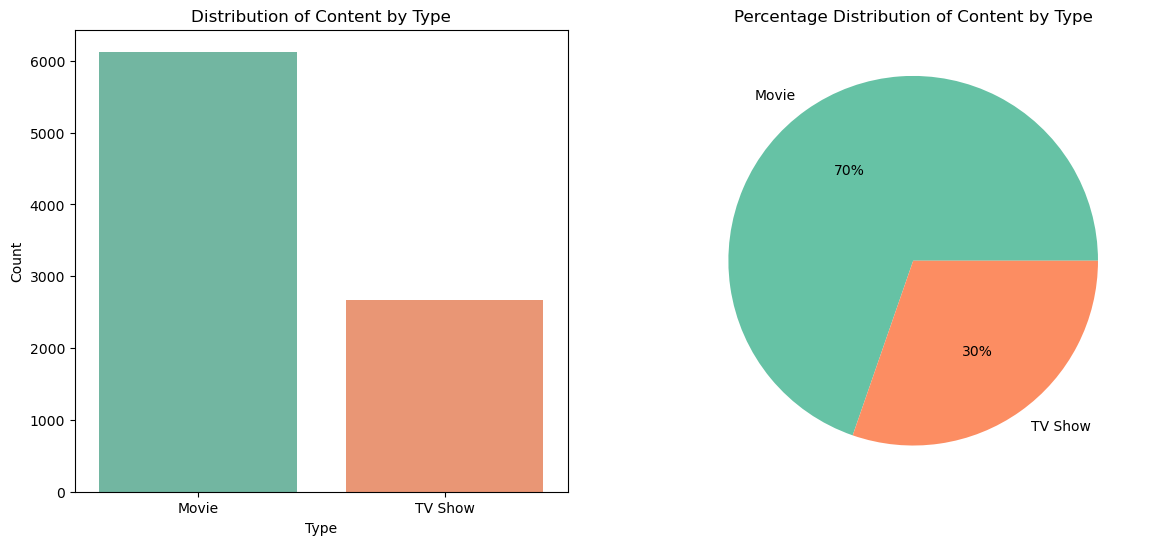

In [11]:
# Content type Distribution (Movies vs TV Shows)

# Count the number of Movies and TV Shows

type_counts = data['type'].value_counts()

# Plot the distribution

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)

sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')

plt.title('Distribution of Content by Type')

plt.xlabel('Type')

plt.ylabel('Count')



plt.subplot(1, 2, 2)

plt.pie(type_counts, labels=type_counts.index, autopct='%.0f%%', colors=sns.color_palette('Set2'))
plt.title('Percentage Distribution of Content by Type')

plt.show()


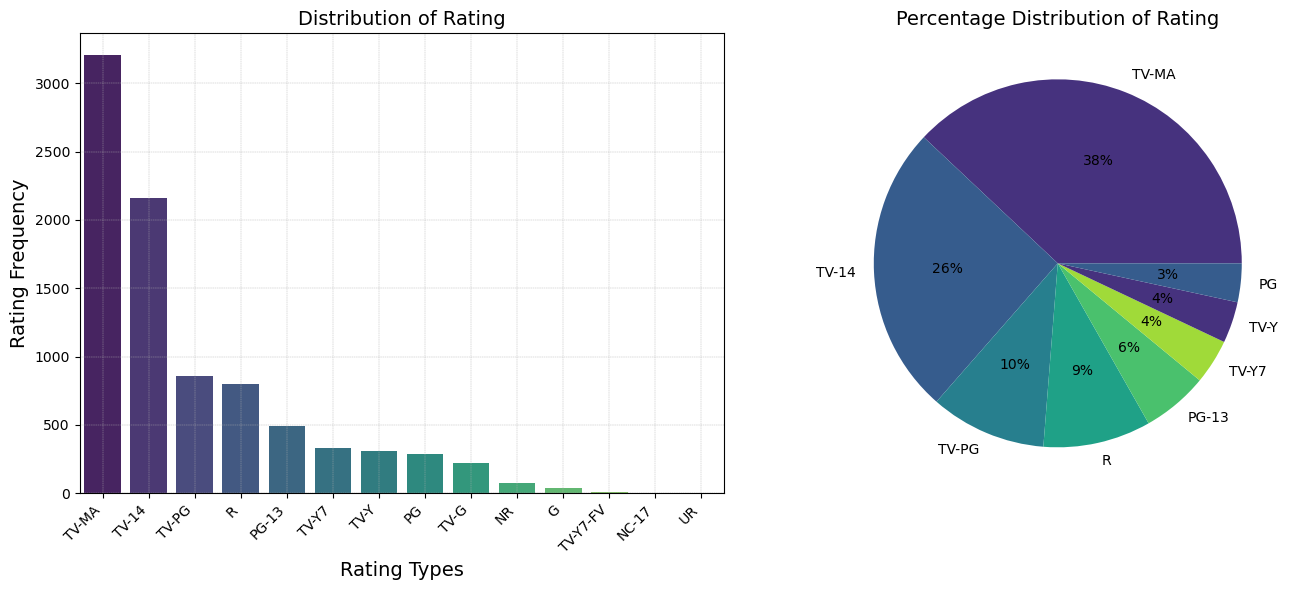

In [13]:

ratings = data['rating'].value_counts().reset_index()
ratings.columns = ['rating', 'count']  # Rename columns for clarity
ratings = ratings.sort_values(by='count', ascending=False)

plt.figure(figsize=(14, 6))

# Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x='rating', y='count', data=ratings, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types", fontsize=14)
plt.ylabel("Rating Frequency", fontsize=14)
plt.title('Distribution of Rating', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.3)

# Pie Chart
plt.subplot(1, 2, 2)
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct='%.0f%%', colors=sns.color_palette('viridis'))
plt.title('Percentage Distribution of Rating', fontsize=14)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


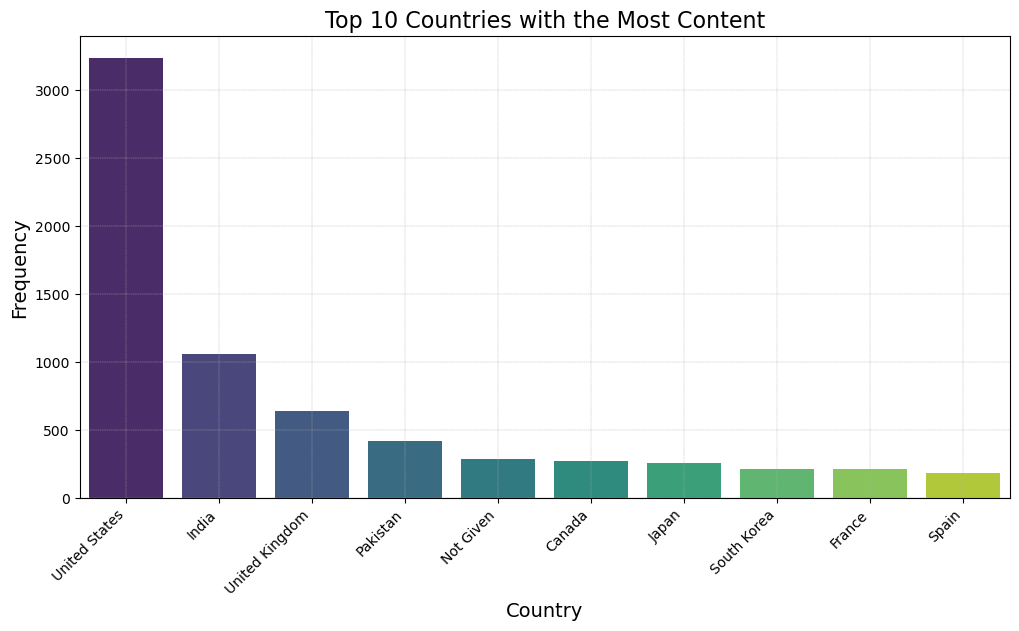

In [15]:
# Calculate top 10 countries with the most content

top_ten_countries = data['country'].value_counts().reset_index()
top_ten_countries.columns = ['country', 'count']  # Rename columns
top_ten_countries = top_ten_countries.sort_values(by='count', ascending=False)[:10]

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='count', data=top_ten_countries, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Top 10 Countries with the Most Content", fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.3)

plt.show()

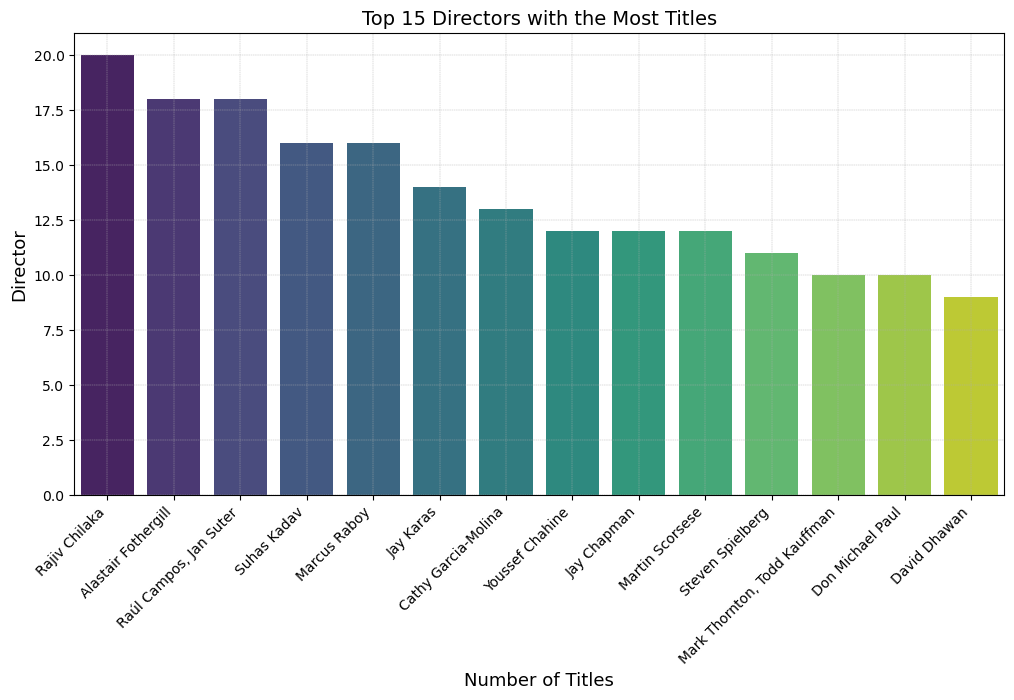

In [16]:
# Count titles by director
top_directors = data['director'].value_counts().reset_index()
top_directors.columns = ['director', 'count']  # Rename columns to 'director' and 'count'
top_directors = top_directors.sort_values(by='count', ascending=False)[1:15]

# Plot top directors
plt.figure(figsize=(12, 6))
sns.barplot(y='count', x='director', data=top_directors, palette='viridis')
plt.title('Top 15 Directors with the Most Titles', fontsize=14)
plt.xlabel('Number of Titles', fontsize=13)
plt.ylabel('Director', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.3)

plt.show()


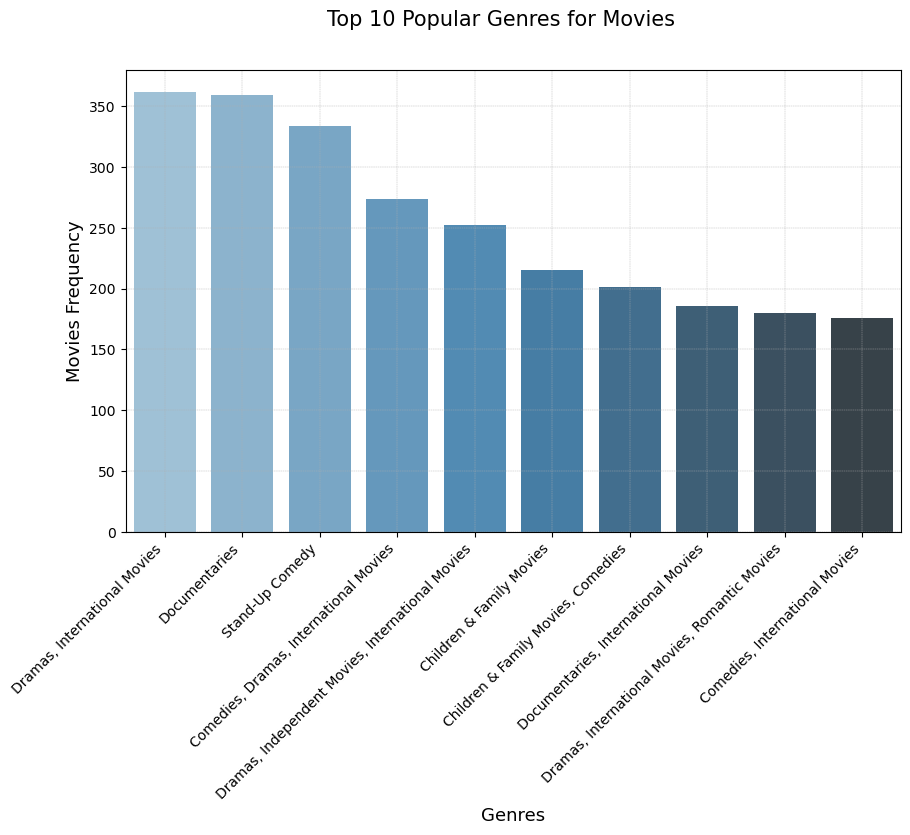

In [17]:
# Top 10 popular genres for movies
popular_movie_genre = data[data['type'] == 'Movie']['listed_in'].value_counts().sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=popular_movie_genre.index, y=popular_movie_genre.values, palette='Blues_d')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres", fontsize=13)
plt.ylabel("Movies Frequency", fontsize=13)
plt.suptitle("Top 10 Popular Genres for Movies", fontsize=15)
plt.grid(True, which='both', linestyle='--', linewidth=0.3)
plt.show()


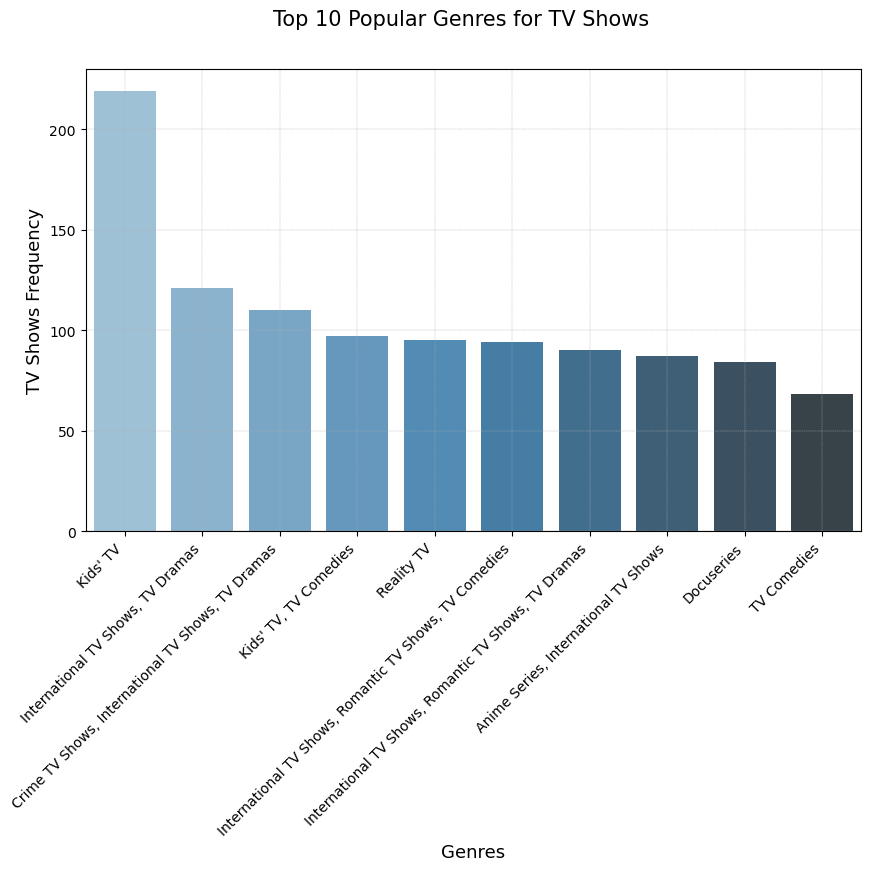

In [18]:
# Top 10 popular genres for TV Shows
popular_series_genre = data[data['type'] == 'TV Show']['listed_in'].value_counts().sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=popular_series_genre.index, y=popular_series_genre.values, palette='Blues_d')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres", fontsize=13)
plt.ylabel("TV Shows Frequency", fontsize=13)
plt.suptitle("Top 10 Popular Genres for TV Shows", fontsize=15)
plt.grid(True, which='both', linestyle='--', linewidth=0.3)
plt.show()


In [19]:
# Ensure 'date_added' is in datetime format
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Extract year and month
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month


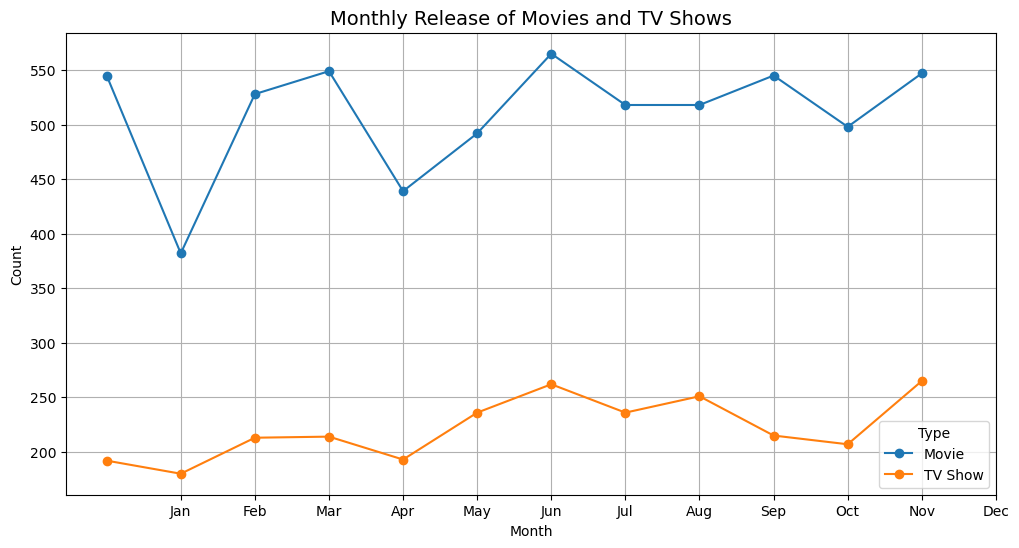

In [20]:
# Ensure that month_added is treated as a categorical variable
data['month_added'] = pd.Categorical(data['month_added'], categories=range(1, 13), ordered=True)

# Plot the data
plt.figure(figsize=(12, 6))

data.groupby(['month_added', 'type']).size().unstack().plot(kind='line', marker='o', ax=plt.gca())

plt.title('Monthly Release of Movies and TV Shows', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Type')
plt.grid(True)
plt.show()


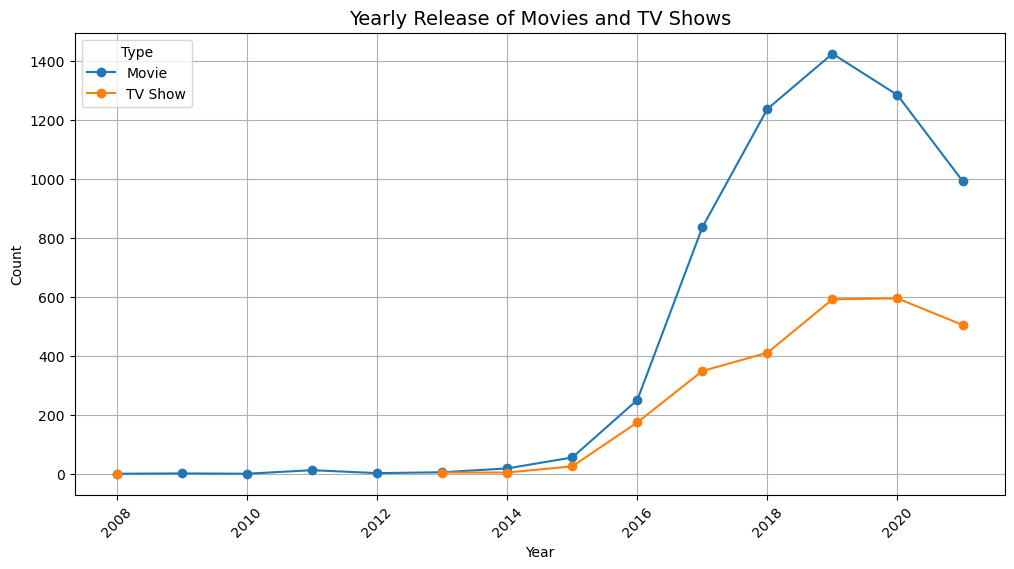

In [21]:
# Plot content added over the years using a line chart
plt.figure(figsize=(12, 6))

data.groupby(['year_added', 'type']).size().unstack().plot(kind='line', marker='o', ax=plt.gca())

plt.title('Yearly Release of Movies and TV Shows', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.grid(True)

plt.show()


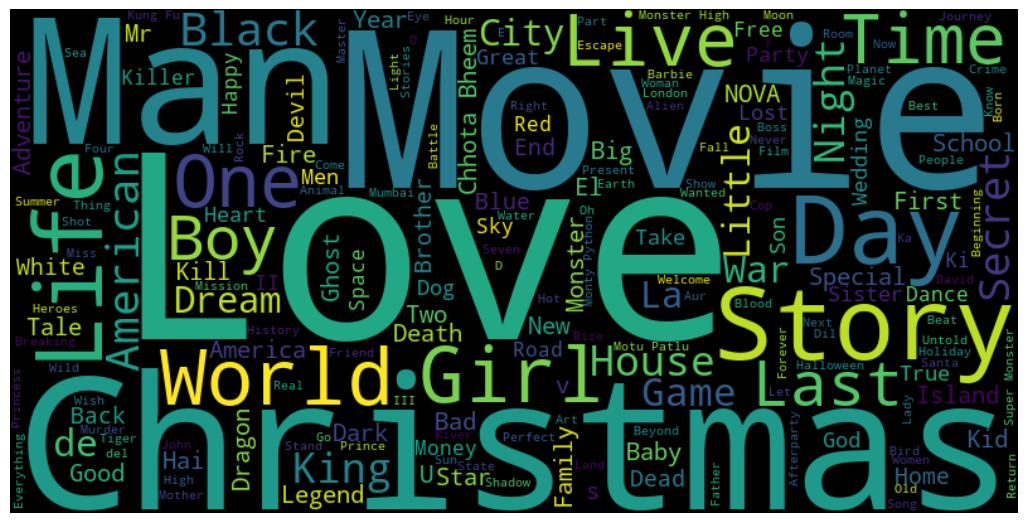

In [22]:
# Create a word cloud for movie titles
movie_titles = data[data['type'] == 'Movie']['title']

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

# Display the word cloud
plt.figure(figsize=(13, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Conclusion

Through this analysis, we have gained valuable insights into the Netflix dataset. We have explored the distribution of content types, genres, and directors, as well as the trends in content release over time. The findings of this analysis can be used to inform content acquisition and production strategies, as well as to identify opportunities for growth and improvement.

Key Insights:

The majority of Netflix content is TV Shows, with a significant increase in TV Show releases over the years.

Movies are the second most common type of content, with a steady release pattern over the years.

The most popular genres are Documentaries, TV Dramas, and Comedies.

The top directors by content count are primarily associated with TV Shows.

There is a clear trend of increasing content release over the years, with a significant spike in 2021.

The word cloud of movie titles highlights the diversity of content available on Netflix.

These insights can be used to guide future content development and acquisition strategies, ensuring that Netflix continues to meet the evolving needs and preferences of its subscribers.